# Análisis de Viajes Compartidos

# Introducción  

En la última década, el paradigma de transporte urbano ha experimentado una transformación significativa con la proliferación de empresas de viajes compartidos. Este fenómeno ha revolucionado la forma en que las personas se desplazan en entornos urbanos, ofreciendo alternativas flexibles y accesibles a los tradicionales servicios de taxi y transporte público.  

El auge de las empresas de viajes compartidos se atribuye a una combinación de factores, entre ellos la facilidad de acceso a través de aplicaciones móviles, la comodidad de compartir viajes con otros usuarios, y una respuesta ágil a las demandas cambiantes de movilidad en entornos urbanos congestionados. Estos servicios han modificado la percepción del transporte, ofreciendo una opción viable y eficiente que se ajusta a los estilos de vida modernos.  

# Descripción del proyecto

Se está trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. La tarea es encontrar patrones en la información disponible. Se requiere comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.  

# Contenido

* [Objetivo](#objetivo)
* [Etapas](#etapas)
* [Diccionario de Datos](#diccionario)
* [Inicialización](#inicio)
* [1 Preparar los datos](#preparar_datos)
    * [1.1 Datos del número de viajes de cada compañía de taxis.](#df_trips_company)
    * [1.2 Datos el promedio de viajes que terminaron en cada barrio de Chicago.](#df_avg_trips)
    * [1.3 Datos sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.](#df_loop_ohare)
* [2 Análisis de los datos](#analisis_datos)
    * [2.1 Análisis descriptivo del número de viajes de cada compañía de taxis.](#trips_company)
    * [2.2 Análisis descriptivo del el promedio de viajes que terminaron en cada barrio de Chicago.](#avg_trips)
    * [2.3 Análisis descriptivo sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.](#loop_ohare)
    * [2.4 Gráficos de las empresas de taxis y los 10 barrios principales por número de finalizaciones.](#taxi_duration)
* [3 Prueba de Hipótesis](#hipotesis)
* [4 Resumen y Conclusión General](#end)

# Objetivo <a id='objetivo'></a>  

* Comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

# Etapas <a id='etapas'></a>  

Se tienen datasets con la información necesaria el número de viajes de cada compañía de taxis, el promedio de viajes que terminaron en cada barrio y las condiciones climáticas en el momento en el que comenzó el viaje con su duración. Se revisarán los datos antes de comenzar a analizar los datos. 

Pasos a realizar:
1. Importar las librerías necesarias
2. Descripción de los datos, leer y guardar el Dataset con Pandas.
3. Procesamiento de los datos, preparar los datos para que sean analizados.
4. Análisis de datos, formulación de hipótesis y creación de gráficos.

# Diccionario de Datos <a id='diccionario'></a>  

• `project_sql_result_01.csv`. Contiene los siguientes datos:  
    `company_name`: nombre de la empresa de taxis  
    `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.  
    
• `project_sql_result_04.csv`. Contiene los siguientes datos:  
    `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes.  
    `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.  
    
• `project_sql_result_07.csv`: Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Valores de campo de la tabla:  
    `start_ts`: fecha y hora de recogida.  
    `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje.  
    `duration_seconds`: duración del viaje en segundos.  
    


# Inicialización <a id='inicio'></a>

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
# Carga de los archivos de datos
df_trips_company = pd.read_csv('files/datasets/project_sql_result_01.csv')
df_avg_trips = pd.read_csv('files/datasets/project_sql_result_04.csv')
df_loop_ohare = pd.read_csv('files/datasets/project_sql_result_07.csv')

## Preparar los datos <a id='preparar_datos'></a>

<span style="color: darkgreen;">  
    
Se muestra la información general/resumida sobre los DataFrame
    
</span>

### Datos del número de viajes de cada compañía de taxis   <a id='df_trips_company'></a>

In [3]:
df_trips_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_trips_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


### Datos el promedio de viajes que terminaron en cada barrio de Chicago  <a id='df_avg_trips'></a>

In [5]:
df_avg_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
df_avg_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Datos sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare  <a id='df_loop_ohare'></a>

In [7]:
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [8]:
df_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<span style="color: darkgreen;">  

La la columna del DataFrame `df_loop_ohare` el tipo de datos es object, entonces se cambia el tipo de dato a date

</span>

In [9]:
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [10]:
# se revisan nuevamente lod tipos de datos del DataFrame
df_loop_ohare.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

## Análisis de los datos <a id='analisis_datos'></a>

<span style="color: darkgreen;">
    
Se calculan los estadísticos descriptivos de cada DataFrame con el método `describe()`, para la varianza se emplea `var()` y para la moda `mode()`. También se grafica un histograma para cada conjunto de datos.  
    
</span>


### Análisis descriptivo del número de viajes de cada compañía de taxis <a id='trips_company'></a>

In [11]:
print('DataFrame df_trips_company:')
# Se calcula la varianza con var() del número de viajes de cada compañía
print('La varianza del número de viajes es:', round(df_trips_company['trips_amount'].var(), 1))
# se calcula la moda de los datos con mode() del número de viajes
print('La moda del número de viajes es:', df_trips_company['trips_amount'].mode()[0], 'y', df_trips_company['trips_amount'].mode()[1])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(df_trips_company['trips_amount'].describe())

DataFrame df_trips_company:
La varianza del número de viajes es: 14533709.0
La moda del número de viajes es: 14 y 29
count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64


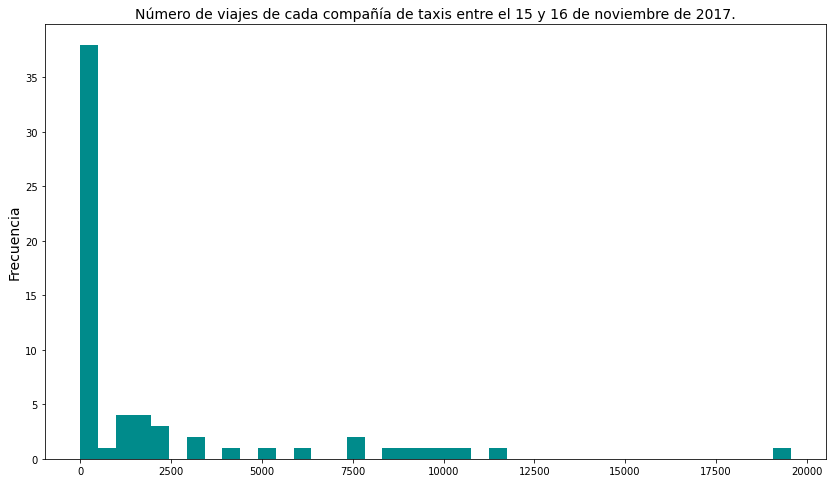

In [12]:
# se grafica el histograma para df_trips_company
df_trips_company['trips_amount'].plot(kind='hist',
                              bins= 40, 
                              color= 'darkcyan',
                              figsize= [14,8]
                             )


plt.title('Número de viajes de cada compañía de taxis entre el 15 y 16 de noviembre de 2017.', fontsize= 14) # para colocar un título
plt.ylabel('Frecuencia', fontsize= 14) # Para nombrar el eje y

plt.show()

<div style="background-color: lightyellow; padding: 10px;">
    
<span style="color: darkblue;">

**Observaciones:**  
Con base en los resultados se observa que la varianza es muy grande para la cantidad de viajes de cada compañia lo que indica que los datos estan dispersos alrededor de la media, podría indicar que hay valores atípicos. La suposición anterior se puede reforzar observando el valor de la media que es de 2145 y la mediana tiene un valor de 178, lo cuál indica y se observa en el historgrama que la distribución de los datos tiene un sesgo hacia la derecha, hay muchos datos altos que afectan la media. Por otro lado, el número de viajes más frecuente son 14 y 29.  
    
</span>

</div>


### Análisis descriptivo del el promedio de viajes que terminaron en cada barrio de Chicago <a id='avg_trips'></a>

In [13]:
print('DataFrame df_avg_trips:')
# Se calcula la varianza con var() del promedio de viajes que terminaron en cada barrio de Chicago
print('La varianza del promedio de viajes es:', round(df_avg_trips['average_trips'].var(), 1))
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(df_avg_trips['average_trips'].describe())

DataFrame df_avg_trips:
La varianza del promedio de viajes es: 2939822.6
count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64


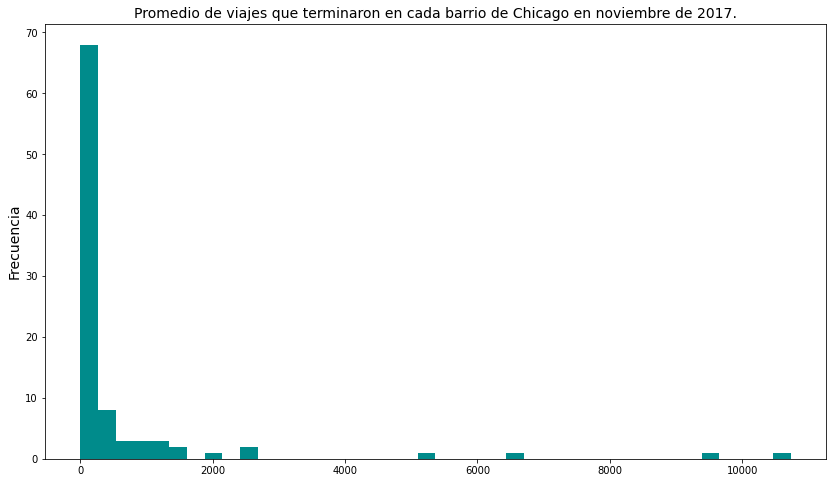

In [14]:
# se grafica el histograma para df_avg_trips
df_avg_trips['average_trips'].plot(kind='hist',
                              bins= 40, 
                              color= 'darkcyan',
                              figsize= [14,8]
                             )


plt.title('Promedio de viajes que terminaron en cada barrio de Chicago en noviembre de 2017.', fontsize= 14) # para colocar un título
plt.ylabel('Frecuencia', fontsize= 14) # Para nombrar el eje y

plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Observaciones:**  
Con base en los resultados se observa que la varianza también es muy grande (2939822.6) para el promedio de viajes que terminaron en cada barrio de Chicago, lo anterior indica que los datos estan dispersos alrededor de la media, lo cual significa que hay valores atípicos. La suposición anterior se refuerza comparando el valor de la media que es de 599.9 y la mediana tiene un valor de 52, también se observa en el historgrama que la distribución de los datos tiene un sesgo hacia la derecha, hay muchos datos altos que afectan la media.  

</span>
    
</div>

### Análisis descriptivo sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare <a id='loop_ohare'></a>

In [15]:
print('DataFrame df_loop_ohare:')
# Se calcula la varianza con var() para la duración del viaje en segundos
print('La varianza para la duración del viaje es:', round(df_loop_ohare['duration_seconds'].var(), 1))
# se calcula la moda de los datos con mode() del número de viajes
print('La moda para la duración del viaje es:', df_loop_ohare['duration_seconds'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(df_loop_ohare['duration_seconds'].describe())

DataFrame df_loop_ohare:
La varianza para la duración del viaje es: 592070.4
La moda para la duración del viaje es: 1380.0
count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64


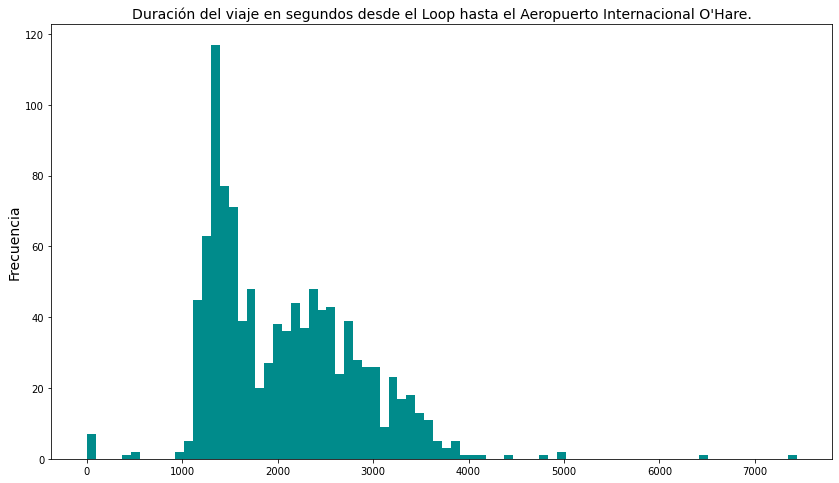

In [16]:
# se grafica el histograma para df_loop_ohare
df_loop_ohare['duration_seconds'].plot(kind='hist',
                              bins= 80, 
                              color= 'darkcyan',
                              figsize= [14,8]
                             )


plt.title("Duración del viaje en segundos desde el Loop hasta el Aeropuerto Internacional O'Hare.", fontsize= 14) # para colocar un título
plt.ylabel('Frecuencia', fontsize= 14) # Para nombrar el eje y

plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Observaciones:**  
Con base en los resultados se observa que la varianza también es grande (592070.4) y la desviación estándar es de 769.46 para la duración del viaje desde el Loop hasta el Aeropuerto Internacional O'Hare, lo cual indica que los datos estan relativamente dispersos alrededor de la media, se puede sugerir que hay valores atípicos. Comparando el valor de la media que es de 2071.7 y la mediana tiene un valor de 1980, los valores son cercanos, pero el valor mínimo y máximo son de 0 y 7440, respectivamente,  estos pueden indicar la presencia de datos extremos o atípicos. También se observa en el historgrama que la distribución de los datos no es normal, hay valores muy bajos así como valores muy altos, los cuales afectan la media. El valor de la duración del viaje más frecuente es de 1380 segundos.  
    
</span>

</div>

###  Gráficos de las empresas de taxis y los 10 barrios principales por número de finalizaciones <a id='taxi_duration'></a>

<span style="color: darkgreen;">

Ahora se identifican los 10 principales barrios en términos de finalización del recorrido del DataFrame `df_avg_trips`. Para esto se ordena el DataFrame de mayor a menor la columna `average_trips`

</span>


In [17]:
# Para los principales barrios se toman los datos del DataFrame 'df_avg_trips'se guardan las 10 primeras filas
# el top 10  se guarda en df_top10_barrios
df_top10_barrios = df_avg_trips.head(10)
df_top10_barrios

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<span style="color: darkgreen;">

El top 10 de los principales barrios son: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast y Sheffield & DePaul.


</span>

<span style="color: darkgreen;">

Ahora se grafican las empresas de los taxis y su número de viajes, también se grafica el top 10 de los principales barrios.


</span>

In [18]:
# Para las empresas de taxis y número de viajes del DataFrame 'df_trips_company'se guardan las 10 primeras filas
# el top 10  se guarda en df_top10_taxis
df_top10_taxis = df_trips_company.head(10)
df_top10_taxis

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


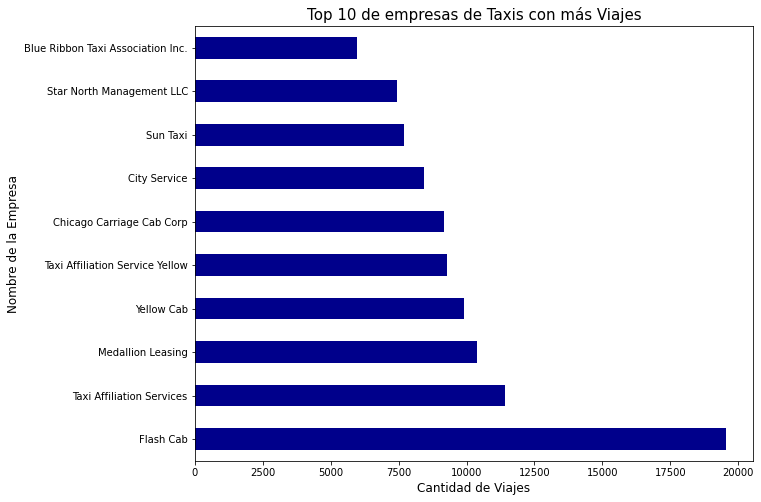

In [19]:
# ahora se grafica el top 10 de las compañias de taxis
df_top10_taxis.plot(x= 'company_name',
                    y= 'trips_amount',
                    kind= 'barh',
                    figsize= [10,8],
                    color= 'darkblue',
                    legend= False
                      )

plt.title('Top 10 de empresas de Taxis con más Viajes', fontsize= 15)
plt.xlabel('Cantidad de Viajes', fontsize= 12)
plt.ylabel('Nombre de la Empresa', fontsize= 12)
                       
plt.show()

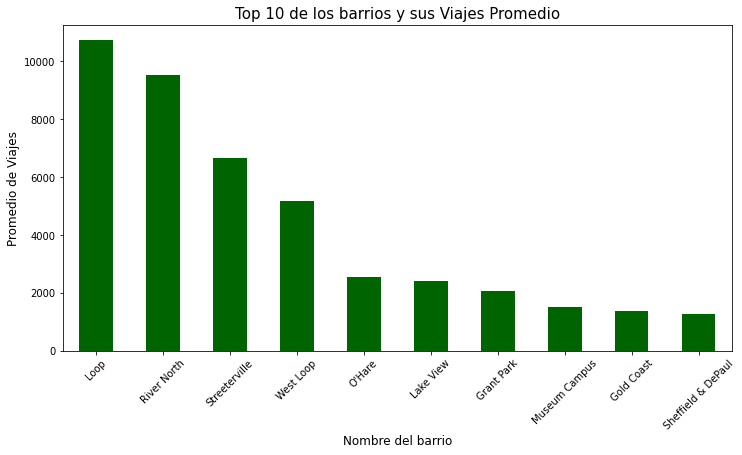

In [20]:
# ahora se grafica el top 10 de los barrios
df_top10_barrios.plot(x= 'dropoff_location_name',
                    y= 'average_trips',
                    kind= 'bar',
                    figsize= [12,6],
                    color= 'darkgreen',
                    legend= False,
                    rot= 45
                      )

plt.title('Top 10 de los barrios y sus Viajes Promedio', fontsize= 15)
plt.xlabel('Nombre del barrio', fontsize= 12)
plt.ylabel('Promedio de Viajes', fontsize= 12)
                       
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Conclusiones:**  
Las dos principales compañias con más viajes en los días el 15 y 16 de noviembre de 2017 son Flash Cab y Taxi Affiliation Services con más de 10,000 viajes en sólo dos días. Mientras que, el promedio de viajes que terminaron pricipalmente en dos barrios de Chicago, que fueron Loop y River North, por lo tanto, se puede sospechar que las dos empresas de taxis antes mencionadas hicieron la mayoría de sus viajes a estos barrios.  

</span>

</div>

## Prueba de Hipótesis <a id='hipotesis'></a>

<span style="color: darkgreen;">

**Prueba de hipótesis**  
Ho: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional
O'Hare es igual en los días con condiciones de climáticas malas y los días con condiciones de climáticas buenas.  
Ha: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional
O'Hare es diferente en los días con condiciones de climáticas malas y los días con condiciones de climáticas buenas.  
Para probar la hipótesis se empleará la función `scipy.stats.ttest_ind(array1, array2, equal_var)`.  
Se empleará el DataFrame `df_loop_ohare` que contiene los datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, se filtra el DataFrame para cada condición climática (Good y Bad) y después para cada DataFrame resultante con los datos se pasarán como argumento la columna `duration_seconds` en los parámetros `array1` y `array2`, respectivamente.  
    
Para determinar el valor del parámetro `equal_var` se hace un test de levene para saber si las varianzas son iguales o diferentes. 
El valor de alfa será de 5 % (0.05).    
</span>

In [21]:
# se filtra el DataFrame df_loop_ohare donde sólo se tengan los datos de las condiciones climáticas buenas (Good)
df_loop_ohare_good = df_loop_ohare[df_loop_ohare['weather_conditions'] == 'Good']
# se filtra el DataFrame df_loop_ohare donde sólo se tengan los datos de las condiciones climáticas malas (Bad)
df_loop_ohare_bad = df_loop_ohare[df_loop_ohare['weather_conditions'] == 'Bad']

<div style="background-color: lightyellow; padding: 10px;">
<span style="color: darkgreen;">

La hipótesis nula (H0) en el test de Levene es que todas las poblaciones tienen varianzas iguales.  
La hipótesis alternativa (Ha) es que al menos una de las poblaciones tiene una varianza diferente.
    
</span>
    
</div>

In [22]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre los dos grupos
alpha= 0.05
duration_levene_results = st.levene(df_loop_ohare_good['duration_seconds'], df_loop_ohare_bad['duration_seconds'])

print('El valor p en el test de levene es:', duration_levene_results.pvalue)

if duration_levene_results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p en el test de levene es: 0.5332038671974493
No se rechaza la hipótesis nula


<div style="background-color: lightyellow; padding: 10px;">
<span style="color: darkgreen;">

De acuerdo al resultado del test de levene no se rechaza la hipótesis nula, por lo que las varianzas son iguales. Entonces el parámetro `equal_var` se deja de forma predeterminada en `True`.
    
</span>
    
</div>

In [23]:
# Se prueba las hipótesis
# valor de alfa
alpha= 0.05
# se asigna el resultado en 'results_score'
results_duration = st.ttest_ind(df_loop_ohare_good['duration_seconds'], df_loop_ohare_bad['duration_seconds'])

print('El valor p es:', results_duration.pvalue)

if results_duration.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p es: 6.517970327099473e-12
Se rechaza la hipótesis nula


<span style="color: darkgreen;">

Se calcula el promedio de la duración de los viajes cuando las condiciones climáticas son buenas y cuando son malas.
    
</span>

In [24]:
# se calcula el promedio de duración con mean() para un buen clima
weather_good_mean_seg = df_loop_ohare_good['duration_seconds'].mean()
# se transforma a minutos
weather_good_mean_min = weather_good_mean_seg / 60
print(f'La duración promedio en buenas condiciones climáticas son {round(weather_good_mean_min)} minutos.')

La duración promedio en buenas condiciones climáticas son 33 minutos.


In [25]:
# se calcula el promedio de duración con mean() para un mal clima
weather_bad_mean_seg = df_loop_ohare_bad['duration_seconds'].mean()
# se transforma a minutos
weather_bad_mean_min = weather_bad_mean_seg / 60
print(f'La duración promedio en malas condiciones climáticas son {round(weather_bad_mean_min)} minutos.')

La duración promedio en malas condiciones climáticas son 40 minutos.


<div style="background-color: lightyellow; padding: 10px;">
<span style="color: black;">

**Conclusiones:**  
De acuerdo al resultado, podemos rechazar la hipótesis nula de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual en los días con condiciones de climáticas malas y los días con condiciones de climáticas buenas son iguales. El resultado indica que la duración de los viajes cuando las condiciones del clima son buenas y cuando son malas es diferente con una confianza estadística del 95%.
    
</span>
    
</div>

## Resumen y Conclusión General <a id='end'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">
    
**Resumen General de los pasos seguidos:**  
1. Análisis de Datos Climáticos en Chicago (noviembre de 2017): se escribió el código para analizar datos climáticos desde el sitio web proporcionado.  
2. Análisis Exploratorio de Datos con SQL:  
Se encontraron el número de viajes en taxi para cada empresa del 15 al 16 de noviembre de 2017.  
Se encontraron la cantidad de viajes para empresas cuyo nombre contenga "Yellow" o "Blue" del 1 al 7 de noviembre de 2017.  
Se encontraron el número de viajes para Flash Cab y Taxi Affiliation Services, agrupar otros como "Other" y ordenar en orden descendente por cantidad de viajes.  
3. Recupración de datos para la Prueba de Hipótesis sobre Duración de Viajes los Sábados Lluviosos:  
Se recuperaron identificadores de barrios de O'Hare y Loop.  
Para cada hora, se recuperaron registros de condiciones meteorológicas y clasificar como "Bad" o "Good".  
Se recuperaro viajes desde el Loop hasta O'Hare los sábados, incluyendo condiciones climáticas y duración.  

4. Análisis Exploratorio de Datos con Python:  
Se importaron y estudiaron dos archivos CSV (`project_sql_result_01.csv` y `project_sql_result_04.csv`).  
Se revisaron que los tipos de datos fueran correctos.  
Se identificaron los 10 principales barrios en términos de finalización de viajes.  
Se crearon gráficos para empresas de taxis y número de viajes, los 10 principales barrios por finalizaciones.  

5. Prueba de Hipótesis con Python:  
Se empleó el archivo `project_sql_result_07.csv`.  
Se hizo la Prueba de la hipótesis y se explicó la formulación de hipótesis nula y alternativa.

</span>

</div>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">
    
**Conclusión General:**  
• Los días 16 y 17 de novimebre los usuarios prefirieron usar los servicios de taxi de las compañias Flash Cab y Taxi Affiliation Services con 19558 y 11422 viajes, respectivamente.  
• En noviembre el promedio de viajes que terminaron pricipalmente en dos barrios de Chicago, en Loop y River North con 10727.4 y 9523.6 viajes en promedio, respectivamente. Además, el Aeropuerto Internacional O'Hare ocupa el lugar 5 del top 10 de barrios principales por número de finalizaciones.   
• La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente en los días con condiciones de climáticas malas y los días con condiciones de climáticas buenas. En promedio la duración de los viajes con condiciones climáticas buenas son 33 minutos y con malas condiciones son 40 minutos.  
    
</span>

</div>